In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_test = pd.read_csv("/kaggle/input/australian-weather-prediction/weatherAUS_test.csv")
df = pd.read_csv("/kaggle/input/australian-weather-prediction/weatherAUS_train.csv")

In [3]:
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2013-07-22,Sydney,8.7,17.2,0.0,3.8,9.9,WNW,54.0,WNW,...,54.0,28.0,1019.4,1016.3,2.0,2.0,12.2,16.6,No,0
1,2015-02-28,Sale,15.4,25.7,0.0,NaN,NaN,W,67.0,NNE,...,84.0,66.0,1008.1,1005.1,8.0,8.0,18.8,24.3,No,1
2,2009-11-18,PerthAirport,15.2,22.2,7.2,5.2,3.3,NW,78.0,NW,...,68.0,91.0,1001.5,1000.1,7.0,8.0,20.1,16.5,Yes,1


In [4]:
print(np.float(len(df)))

101822.0


In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
#Categorical: Date, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday

In [7]:
cat = [var for var in df.columns if df[var].dtype=='O']
df[cat].isnull().sum()

Date              0
Location          0
WindGustDir    7318
WindDir9am     7391
WindDir3pm     2986
RainToday      2300
dtype: int64

In [8]:
#Let's devide data on day, month and year
df['Date'] = pd.to_datetime(df['Date']) #new format
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace = True) #delete "Date"
df.head(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Sydney,8.7,17.2,0.0,3.8,9.9,WNW,54.0,WNW,W,...,1016.3,2.0,2.0,12.2,16.6,No,0,2013,7,22
1,Sale,15.4,25.7,0.0,NaN,NaN,W,67.0,NNE,WSW,...,1005.1,8.0,8.0,18.8,24.3,No,1,2015,2,28
2,PerthAirport,15.2,22.2,7.2,5.2,3.3,NW,78.0,NW,WSW,...,1000.1,7.0,8.0,20.1,16.5,Yes,1,2009,11,18


In [9]:
df.drop('Location', axis=1, inplace = True) #delete "Date"

In [10]:

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    22320
NaN     2300
dtype: int64

In [11]:
df = df.dropna(axis='index', how='any', subset=['RainToday'])

In [12]:
#Let's see, how much missing values we have
num = [var for var in df.columns if df[var].dtype!='O']
df[num].isnull().sum()

MinTemp            331
MaxTemp            331
Rainfall             0
Evaporation      42244
Sunshine         47354
WindGustSpeed     6853
WindSpeed9am       792
WindSpeed3pm      1874
Humidity9am       1083
Humidity3pm       2559
Pressure9am       9768
Pressure3pm       9798
Cloud9am         37178
Cloud3pm         39669
Temp9am            469
Temp3pm           1928
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

In [13]:
df = df.dropna(axis='index', how='any', subset=['MinTemp'])
df = df.dropna(axis='index', how='any', subset=['MaxTemp'])
df = df.dropna(axis='index', how='any', subset=['WindSpeed9am'])
df = df.dropna(axis='index', how='any', subset=['WindSpeed3pm'])
df = df.dropna(axis='index', how='any', subset=['Humidity9am'])
df = df.dropna(axis='index', how='any', subset=['Humidity3pm'])
df = df.dropna(axis='index', how='any', subset=['Temp9am'])
df = df.dropna(axis='index', how='any', subset=['Temp3pm'])

In [14]:
df[num].isnull().sum()

MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      40079
Sunshine         44237
WindGustSpeed     4783
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am       8185
Pressure3pm       8144
Cloud9am         35577
Cloud3pm         36580
Temp9am              0
Temp3pm              0
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

In [15]:
print(np.float(len(df)))

95716.0


### Corellation:

In [16]:
corr_matrix=df.corr()
corr_matrix['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.444134
Cloud3pm         0.379180
Cloud9am         0.311599
Humidity9am      0.253716
Rainfall         0.241344
WindGustSpeed    0.231396
WindSpeed9am     0.087976
MinTemp          0.087448
WindSpeed3pm     0.084987
Month            0.005167
Day              0.003761
Year            -0.013126
Temp9am         -0.022454
Evaporation     -0.118795
MaxTemp         -0.155345
Temp3pm         -0.189661
Pressure3pm     -0.227927
Pressure9am     -0.246564
Sunshine        -0.450837
Name: RainTomorrow, dtype: float64

In [17]:
#Let's remove the unnecessary features for the models
#Location: It doesn't matter
#Evaporation, Sunshine, Cloud9am, Cloud3pm : This features have much null values and a large grade.

In [18]:
df = df.drop(columns=['Evaporation', 'Cloud9am', 'Cloud3pm'], axis=1)
#df = df.drop(columns=['Month', 'Day', 'Year', 'Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm'], axis=1)
df.head()

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,8.7,17.2,0.0,9.9,WNW,54.0,WNW,W,17.0,26.0,...,28.0,1019.4,1016.3,12.2,16.6,No,0,2013,7,22
1,15.4,25.7,0.0,NaN,W,67.0,NNE,WSW,11.0,9.0,...,66.0,1008.1,1005.1,18.8,24.3,No,1,2015,2,28
2,15.2,22.2,7.2,3.3,NW,78.0,NW,WSW,33.0,28.0,...,91.0,1001.5,1000.1,20.1,16.5,Yes,1,2009,11,18
3,19.9,26.4,0.0,NaN,SW,24.0,NNE,WSW,13.0,9.0,...,97.0,1004.6,1002.1,22.6,22.3,No,1,2014,2,19
4,19.3,32.9,0.0,NaN,W,48.0,NNW,W,19.0,22.0,...,15.0,1022.8,1020.7,22.1,32.6,No,0,2015,10,4


In [19]:
#Let's see distributions

Text(0, 0.5, 'RainTomorrow')

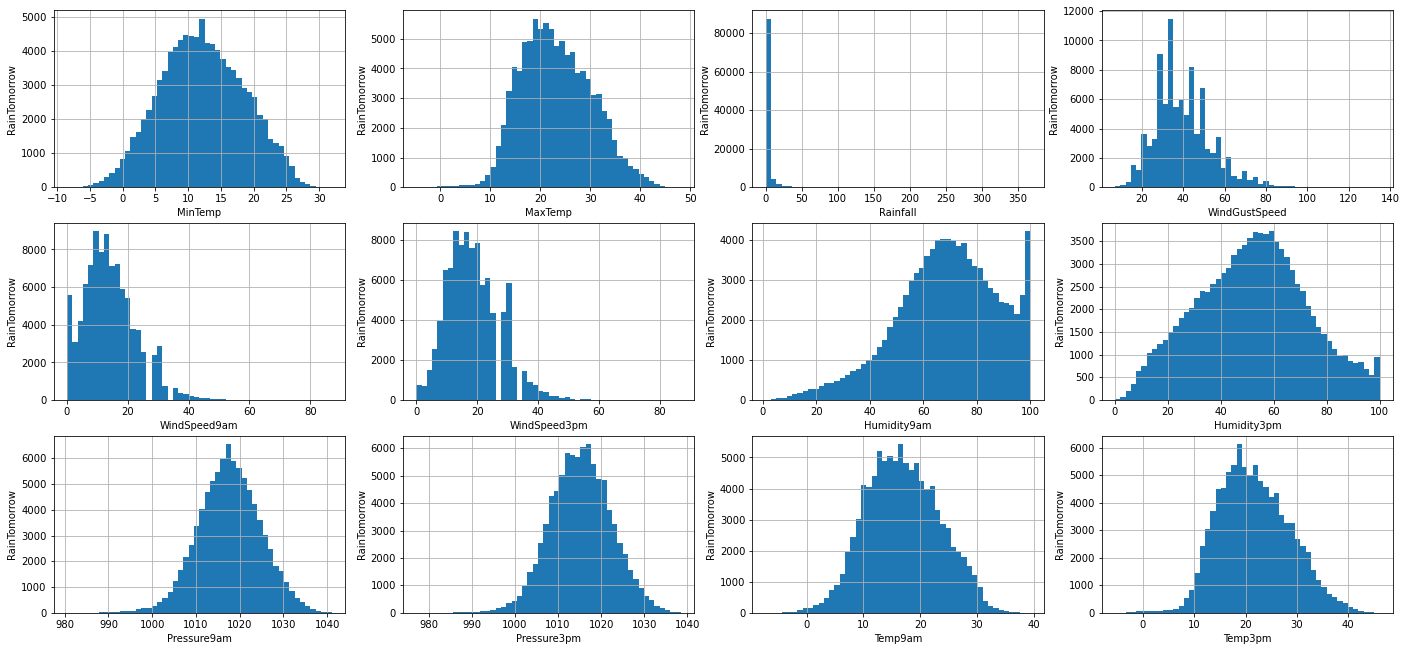

In [20]:
plt.figure(figsize=(24,15))

plt.subplot(4, 4, 1)
fig = df.MinTemp.hist(bins=50)
fig.set_xlabel('MinTemp')
fig.set_ylabel('RainTomorrow')

plt.subplot(4, 4, 2)
fig = df.MaxTemp.hist(bins=50)
fig.set_xlabel('MaxTemp')
fig.set_ylabel('RainTomorrow')

plt.subplot(4, 4, 3)
fig = df.Rainfall.hist(bins=50)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(4, 4, 4)
fig = df.WindGustSpeed.hist(bins=50)
fig.set_xlabel('WindGustSpeed')
fig.set_ylabel('RainTomorrow')

plt.subplot(4, 4, 5)
fig = df.WindSpeed9am.hist(bins=50)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(4, 4, 6)
fig = df.WindSpeed3pm.hist(bins=50)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

plt.subplot(4, 4, 7)
fig = df.Humidity9am.hist(bins=50)
fig.set_xlabel('Humidity9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(4, 4, 8)
fig = df.Humidity3pm.hist(bins=50)
fig.set_xlabel('Humidity3pm')
fig.set_ylabel('RainTomorrow')

plt.subplot(4, 4, 9)
fig = df.Pressure9am.hist(bins=50)
fig.set_xlabel('Pressure9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(4, 4, 10)
fig = df.Pressure3pm.hist(bins=50)
fig.set_xlabel('Pressure3pm')
fig.set_ylabel('RainTomorrow')

plt.subplot(4, 4, 11)
fig = df.Temp9am.hist(bins=50)
fig.set_xlabel('Temp9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(4, 4, 12)
fig = df.Temp3pm.hist(bins=50)
fig.set_xlabel('Temp3pm')
fig.set_ylabel('RainTomorrow')

## Removing outliers

In [21]:
num = [var for var in df.columns if df[var].dtype!='O']
print(round(df[num].describe()))

       MinTemp  MaxTemp  Rainfall  Sunshine  WindGustSpeed  WindSpeed9am  \
count  95716.0  95716.0   95716.0   51479.0        90933.0       95716.0   
mean      12.0     23.0       2.0       8.0           40.0          14.0   
std        6.0      7.0       8.0       4.0           14.0           9.0   
min       -8.0     -5.0       0.0       0.0            7.0           0.0   
25%        8.0     18.0       0.0       5.0           31.0           7.0   
50%       12.0     23.0       0.0       8.0           39.0          13.0   
75%       17.0     28.0       1.0      11.0           48.0          19.0   
max       32.0     48.0     368.0      14.0          135.0          87.0   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
count       95716.0      95716.0      95716.0      87531.0      87572.0   
mean           19.0         69.0         51.0       1018.0       1015.0   
std             9.0         19.0         21.0          7.0          7.0   
min            

In [22]:
# We see problems in Rainfall, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm

In [23]:
IQR = df.WindGustSpeed.quantile(0.75) - df.WindGustSpeed.quantile(0.25)
Lower_fence = df.WindGustSpeed.quantile(0.25) - (IQR * 3/2)
Upper_fence = df.WindGustSpeed.quantile(0.75) + (IQR * 3/2)
print('WindGustSpeed outliers are values < {lowerboundary} or > {upperboundary}'.format(
    lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindGustSpeed outliers are values < 5.5 or > 73.5


In [24]:
df = df.drop(df[df.WindGustSpeed > 74].index)
df = df.drop(df[df.WindGustSpeed < 5].index)

In [25]:
df[num].isnull().sum()

MinTemp              0
MaxTemp              0
Rainfall             0
Sunshine         43553
WindGustSpeed     4783
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am       8053
Pressure3pm       8012
Temp9am              0
Temp3pm              0
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

In [26]:
print(np.float(len(df)))

94035.0


In [27]:
from scipy import stats

df['z_score']=stats.zscore(df['Rainfall'])
df = df.drop(df[df.z_score.abs() > 3].index)

df['z_score']=stats.zscore(df['WindSpeed9am'])
df = df.drop(df[df.z_score.abs() > 3].index)

df['z_score']=stats.zscore(df['WindSpeed3pm'])
df = df.drop(df[df.z_score.abs() > 3].index)

df['z_score']=stats.zscore(df['Humidity9am'])
df = df.drop(df[df.z_score.abs() > 3].index)

df['z_score']=stats.zscore(df['Humidity3pm'])
df = df.drop(df[df.z_score.abs() > 3].index)
df.drop('z_score', axis=1, inplace = True)

In [28]:
print(np.float(len(df)))

91150.0


### Extract input and output data from the dataset:

In [29]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [30]:
print(X)

        MinTemp  MaxTemp  Rainfall  Sunshine WindGustDir  WindGustSpeed  \
0           8.7     17.2       0.0       9.9         WNW           54.0   
1          15.4     25.7       0.0       NaN           W           67.0   
3          19.9     26.4       0.0       NaN          SW           24.0   
4          19.3     32.9       0.0       NaN           W           48.0   
6          -0.3     14.2       0.0       9.7         NNW           43.0   
...         ...      ...       ...       ...         ...            ...   
101816      0.6     12.8       0.0       6.1         ENE           26.0   
101817     11.6     17.0       3.0       NaN         NNW           50.0   
101818      7.6     20.4       0.0       9.2         ENE           30.0   
101820     10.5     14.6       4.0       NaN           S           33.0   
101821      8.2     19.8       0.6       NaN         NaN            NaN   

       WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0             WNW         

In [31]:
print(y)

0         0
1         1
3         1
4         0
6         0
         ..
101816    0
101817    1
101818    0
101820    1
101821    0
Name: RainTomorrow, Length: 91150, dtype: int64


In [32]:
df1=np.copy(df)
df2=np.copy(df)
df3=np.copy(df)

In [33]:
cat = [col for col in X.columns if X[col].dtypes == 'O']
num = [col for col in X.columns if X[col].dtypes != 'O']

In [34]:
for df1 in [X]:
    for col in num:
        col_median=X[col].median()
        df1[col].fillna(col_median, inplace=True) 

In [35]:
X[num].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [36]:
for df2 in [X]:
    df2['WindGustDir'].fillna(X['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X['RainToday'].mode()[0], inplace=True)

In [37]:
X[cat].isnull().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [38]:
print(X)

        MinTemp  MaxTemp  Rainfall  Sunshine WindGustDir  WindGustSpeed  \
0           8.7     17.2       0.0       9.9         WNW           54.0   
1          15.4     25.7       0.0       8.6           W           67.0   
3          19.9     26.4       0.0       8.6          SW           24.0   
4          19.3     32.9       0.0       8.6           W           48.0   
6          -0.3     14.2       0.0       9.7         NNW           43.0   
...         ...      ...       ...       ...         ...            ...   
101816      0.6     12.8       0.0       6.1         ENE           26.0   
101817     11.6     17.0       3.0       8.6         NNW           50.0   
101818      7.6     20.4       0.0       9.2         ENE           30.0   
101820     10.5     14.6       4.0       8.6           S           33.0   
101821      8.2     19.8       0.6       8.6           W           37.0   

       WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0             WNW         

### Working with categorical variables:

In [39]:
from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()
X['WindGustDir'] = X_labelencoder.fit_transform(X['WindGustDir'])
X['WindDir9am'] = X_labelencoder.fit_transform(X['WindDir9am'])
X['WindDir3pm'] = X_labelencoder.fit_transform(X['WindDir3pm'])
X['RainToday'] = X_labelencoder.fit_transform(X['RainToday'])

In [40]:
print(X)

        MinTemp  MaxTemp  Rainfall  Sunshine  WindGustDir  WindGustSpeed  \
0           8.7     17.2       0.0       9.9           14           54.0   
1          15.4     25.7       0.0       8.6           13           67.0   
3          19.9     26.4       0.0       8.6           12           24.0   
4          19.3     32.9       0.0       8.6           13           48.0   
6          -0.3     14.2       0.0       9.7            6           43.0   
...         ...      ...       ...       ...          ...            ...   
101816      0.6     12.8       0.0       6.1            1           26.0   
101817     11.6     17.0       3.0       8.6            6           50.0   
101818      7.6     20.4       0.0       9.2            1           30.0   
101820     10.5     14.6       4.0       8.6            8           33.0   
101821      8.2     19.8       0.6       8.6           13           37.0   

        WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0           

In [41]:
print(y)

0         0
1         1
3         1
4         0
6         0
         ..
101816    0
101817    1
101818    0
101820    1
101821    0
Name: RainTomorrow, Length: 91150, dtype: int64


In [42]:
X1 = X.values
y1 = y.values
print(X1)
print(y1)

[[8.700e+00 1.720e+01 0.000e+00 ... 2.013e+03 7.000e+00 2.200e+01]
 [1.540e+01 2.570e+01 0.000e+00 ... 2.015e+03 2.000e+00 2.800e+01]
 [1.990e+01 2.640e+01 0.000e+00 ... 2.014e+03 2.000e+00 1.900e+01]
 ...
 [7.600e+00 2.040e+01 0.000e+00 ... 2.015e+03 6.000e+00 2.500e+01]
 [1.050e+01 1.460e+01 4.000e+00 ... 2.011e+03 6.000e+00 1.300e+01]
 [8.200e+00 1.980e+01 6.000e-01 ... 2.010e+03 9.000e+00 1.100e+01]]
[0 1 1 ... 0 1 0]


In [43]:
df_test.head(3)

,Id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0,2016-04-05,Sale,7.6,28.1,0.0,NaN,NaN,NaN,NaN,...,9.0,98.0,38.0,1012.8,1009.1,NaN,NaN,14.2,27.5,No
1,1,2015-02-10,Tuggeranong,17.0,28.9,0.0,NaN,NaN,E,33.0,...,11.0,75.0,46.0,1024.7,1020.5,NaN,NaN,18.9,27.7,No
2,2,2011-12-21,SydneyAirport,18.6,22.7,0.0,6.8,5.5,SSW,37.0,...,26.0,71.0,75.0,1018.6,1017.0,7.0,6.0,20.3,21.2,No


In [44]:
print(np.float(len(df_test)))

43638.0


In [45]:
df_test.columns

Index(['Id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday'],
      dtype='object')

In [46]:
cat_test = [var for var in df_test.columns if df_test[var].dtype=='O']
df_test[cat_test].isnull().sum()

Date              0
Location          0
WindGustDir    3008
WindDir9am     3175
WindDir3pm     1242
RainToday       961
dtype: int64

In [47]:
df_test[cat_test].isnull().sum()

Date              0
Location          0
WindGustDir    3008
WindDir9am     3175
WindDir3pm     1242
RainToday       961
dtype: int64

In [48]:
df_test['Date'] = pd.to_datetime(df_test['Date']) #new format
df_test['Year'] = df_test['Date'].dt.year
df_test['Month'] = df_test['Date'].dt.month
df_test['Day'] = df_test['Date'].dt.day
df_test.drop('Date', axis=1, inplace = True)
df_test.drop('Location', axis=1, inplace = True)

In [49]:
num_test = [var for var in df_test.columns if df_test[var].dtype!='O']
df_test[num_test].isnull().sum()

Id                   0
MinTemp            458
MaxTemp            386
Rainfall           961
Evaporation      18901
Sunshine         21035
WindGustSpeed     2991
WindSpeed9am       495
WindSpeed3pm       903
Humidity9am        800
Humidity3pm       1347
Pressure9am       4511
Pressure3pm       4510
Cloud9am         16899
Cloud3pm         17938
Temp9am            541
Temp3pm           1091
Year                 0
Month                0
Day                  0
dtype: int64

In [50]:
df_test = df_test.drop(columns=['Evaporation', 'Cloud9am', 'Cloud3pm'], axis=1)
df_test.head()

,Id,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,0,7.6,28.1,0.0,NaN,NaN,NaN,WNW,E,7.0,...,98.0,38.0,1012.8,1009.1,14.2,27.5,No,2016,4,5
1,1,17.0,28.9,0.0,NaN,E,33.0,NaN,NNW,0.0,...,75.0,46.0,1024.7,1020.5,18.9,27.7,No,2015,2,10
2,2,18.6,22.7,0.0,5.5,SSW,37.0,SW,S,9.0,...,71.0,75.0,1018.6,1017.0,20.3,21.2,No,2011,12,21
3,3,23.0,31.5,13.0,NaN,W,57.0,NW,WNW,24.0,...,93.0,NaN,1003.1,999.6,24.0,NaN,Yes,2016,12,31
4,4,18.7,26.1,0.0,NaN,E,26.0,E,E,13.0,...,73.0,69.0,1017.0,1014.0,23.4,23.5,No,2010,10,27


In [51]:
df.head()

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,8.7,17.2,0.0,9.9,WNW,54.0,WNW,W,17.0,26.0,...,28.0,1019.4,1016.3,12.2,16.6,No,0,2013,7,22
1,15.4,25.7,0.0,NaN,W,67.0,NNE,WSW,11.0,9.0,...,66.0,1008.1,1005.1,18.8,24.3,No,1,2015,2,28
3,19.9,26.4,0.0,NaN,SW,24.0,NNE,WSW,13.0,9.0,...,97.0,1004.6,1002.1,22.6,22.3,No,1,2014,2,19
4,19.3,32.9,0.0,NaN,W,48.0,NNW,W,19.0,22.0,...,15.0,1022.8,1020.7,22.1,32.6,No,0,2015,10,4
6,-0.3,14.2,0.0,9.7,NNW,43.0,NW,NNW,13.0,28.0,...,50.0,1019.0,1015.5,9.2,13.7,No,0,2010,9,18


In [52]:
X_test = df_test.drop(['Id'], axis=1)
print(X_test)

       MinTemp  MaxTemp  Rainfall  Sunshine WindGustDir  WindGustSpeed  \
0          7.6     28.1       0.0       NaN         NaN            NaN   
1         17.0     28.9       0.0       NaN           E           33.0   
2         18.6     22.7       0.0       5.5         SSW           37.0   
3         23.0     31.5      13.0       NaN           W           57.0   
4         18.7     26.1       0.0       NaN           E           26.0   
...        ...      ...       ...       ...         ...            ...   
43633      6.9     14.0       0.0       NaN           W           31.0   
43634      9.8     22.6       0.2       NaN           E           31.0   
43635     16.2     25.5       0.0       NaN          SW           33.0   
43636      9.6     15.7       3.0       2.0           S           41.0   
43637      9.7     18.6       0.0       0.7         ENE           37.0   

      WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0            WNW          E           7

In [53]:
df_test1=np.copy(df_test)
df_test2=np.copy(df_test)
df_test3=np.copy(df_test)

In [54]:
cat = [col for col in X_test.columns if X_test[col].dtypes == 'O']
num = [col for col in X_test.columns if X_test[col].dtypes != 'O']

In [55]:
for df_test1 in [X_test]:
    for col in num:
        col_median=X_test[col].median()
        df_test1[col].fillna(col_median, inplace=True) 

In [56]:
X_test[num].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [57]:
for df_test2 in [X_test]:
    df_test2['WindGustDir'].fillna(X_test['WindGustDir'].mode()[0], inplace=True)
    df_test2['WindDir9am'].fillna(X_test['WindDir9am'].mode()[0], inplace=True)
    df_test2['WindDir3pm'].fillna(X_test['WindDir3pm'].mode()[0], inplace=True)
    df_test2['RainToday'].fillna(X_test['RainToday'].mode()[0], inplace=True)

In [58]:
X_test[cat].isnull().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [59]:
print(X_test)

       MinTemp  MaxTemp  Rainfall  Sunshine WindGustDir  WindGustSpeed  \
0          7.6     28.1       0.0       8.5           W           39.0   
1         17.0     28.9       0.0       8.5           E           33.0   
2         18.6     22.7       0.0       5.5         SSW           37.0   
3         23.0     31.5      13.0       8.5           W           57.0   
4         18.7     26.1       0.0       8.5           E           26.0   
...        ...      ...       ...       ...         ...            ...   
43633      6.9     14.0       0.0       8.5           W           31.0   
43634      9.8     22.6       0.2       8.5           E           31.0   
43635     16.2     25.5       0.0       8.5          SW           33.0   
43636      9.6     15.7       3.0       2.0           S           41.0   
43637      9.7     18.6       0.0       0.7         ENE           37.0   

      WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0            WNW          E           7

In [60]:
from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()
X_test['WindGustDir'] = X_labelencoder.fit_transform(X_test['WindGustDir'])
X_test['WindDir9am'] = X_labelencoder.fit_transform(X_test['WindDir9am'])
X_test['WindDir3pm'] = X_labelencoder.fit_transform(X_test['WindDir3pm'])
X_test['RainToday'] = X_labelencoder.fit_transform(X_test['RainToday'])

In [61]:
print(X_test)

       MinTemp  MaxTemp  Rainfall  Sunshine  WindGustDir  WindGustSpeed  \
0          7.6     28.1       0.0       8.5           13           39.0   
1         17.0     28.9       0.0       8.5            0           33.0   
2         18.6     22.7       0.0       5.5           11           37.0   
3         23.0     31.5      13.0       8.5           13           57.0   
4         18.7     26.1       0.0       8.5            0           26.0   
...        ...      ...       ...       ...          ...            ...   
43633      6.9     14.0       0.0       8.5           13           31.0   
43634      9.8     22.6       0.2       8.5            0           31.0   
43635     16.2     25.5       0.0       8.5           12           33.0   
43636      9.6     15.7       3.0       2.0            8           41.0   
43637      9.7     18.6       0.0       0.7            1           37.0   

       WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0              14        

In [62]:
X_test1 = X_test.values
print(X_test1)

[[7.600e+00 2.810e+01 0.000e+00 ... 2.016e+03 4.000e+00 5.000e+00]
 [1.700e+01 2.890e+01 0.000e+00 ... 2.015e+03 2.000e+00 1.000e+01]
 [1.860e+01 2.270e+01 0.000e+00 ... 2.011e+03 1.200e+01 2.100e+01]
 ...
 [1.620e+01 2.550e+01 0.000e+00 ... 2.016e+03 4.000e+00 2.200e+01]
 [9.600e+00 1.570e+01 3.000e+00 ... 2.016e+03 9.000e+00 2.100e+01]
 [9.700e+00 1.860e+01 0.000e+00 ... 2.010e+03 1.000e+01 1.000e+00]]


### Logistic Regression:

In [63]:
#Importing required libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
#Loading the dataset
#data = load_breast_cancer(as_frame = True)
#df = data.frame
#X = df.iloc[:,:-1]
#y = df.iloc[:,-1]
 
#Implementing cross validation
k = 2
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X1):
    X_train , X_t = X1[train_index,:],X1[test_index,:]
    y_train , y_t = y1[train_index] , y1[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_t)
     
    acc = accuracy_score(pred_values , y_t)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

pred_values = model.predict(X_test)

print(pred_values)

accuracy of each fold - [0.8497641250685682, 0.8527482172243555]
Avg accuracy : 0.8512561711464619
[0 0 0 ... 0 1 0]


In [64]:
pred_frame = pd.DataFrame(pred_values)
print(pred_values)

[0 0 0 ... 0 1 0]


In [65]:
np.savetxt("turn2.csv", pred_values, delimiter=",",fmt="%d")